In [ ]:
from google.colab import files
pc = files.upload()["data.pc"]

Saving data.pc to data.pc


In [ ]:
from io import BytesIO
file_like = BytesIO(pc)

In [ ]:
from pandas import read_pickle
data = read_pickle(file_like)
columns = data.pop(0)

In [ ]:
from pandas import DataFrame
df = DataFrame(data, columns = columns)

In [ ]:
len(df)

96153

In [ ]:
from bs4 import BeautifulSoup
from requests import get
class User(object):
    cache = {}
    def __init__(self, id, url = "http://baker-forum.ir/member.php?action=profile&uid="):
        url += str(id)
        raw = get(url)
        while raw.status_code != 200:
            print("problem with fetching " + url)
            raw = get(url)
        page = raw.text
        bs = BeautifulSoup(page, 'html.parser')
        self.name = bs.select("strong > span > strong")[0].string
        User.cache[id] = self
    @classmethod
    def get(cls, id):
      if id in User.cache.keys():
        return User.cache[id]
      else:
        return User(id)
    @classmethod
    def flush(cls):
      User.cache.clear()

In [ ]:
[User.get(id).name for id in [2274, 3074, 1034, 2903, 986, 635, 1714, 2803, 2905, 2914, 2454, 2883, 321]]

['Louis',
 'Percy -2',
 ':78:',
 'Lili Stark',
 '♥♥♥♥',
 'liosa',
 'BaBa Yaga',
 'Alishia',
 'Sherlocka1985',
 '!Sherlock',
 'DarkGuy',
 'Mor',
 'The Consulting Criminal']

In [ ]:
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة')

sizes = []
labels = []
for id, count in dict(df['user'].value_counts()).items():
  labels.append(f(User.get(id).name))
  sizes.append(count)
  print(User.get(id).name + ' '+ str(count))
  if(count < 000):
    break
labels.append(f("other"))
sizes.append(len(df)-sum(sizes))

Louis 16648
Sherlocka1985 16360
Lili Stark 13709
شرلوک‌هلمز 11563
liosa 5592
DarkGuy 5386
Percy -2 4694
Alishia 4350
♥♥♥♥ 3353
The Consulting Criminal 3158
arsha 2703
پسر انسان 2248
Mor 1970
Dazai 1221
Meshkat 805
Cripher 728
Ἄτλας 352
Rend 242
Ed ed edi 230
Harry 143
^_^ 87
Nila 76
Jim.moriarty 73
nika 68
hyeya 46
omid.rph 46
sheiza 45
Rosita 38
شرل 37
yellownarcissus 31
Mobina 31
Milad 30
.Yasaman. 22
Barney 19
مسی 19
Lestrade 10
فازی - ری 8
max23 7
RON!N 3
دوست جمجمه ای 2


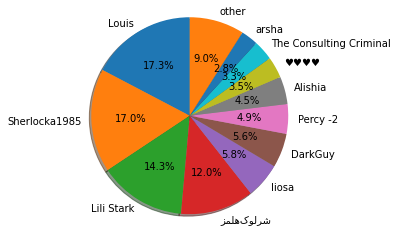

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
def f(str):
  reshaped_text = arabic_reshaper.reshape(u'' + str)
  return get_display(reshaped_text)
